In [8]:
from argparse import ArgumentParser
from mmengine.model import revert_sync_batchnorm
from mmseg.apis import inference_model, init_model, show_result_pyplot
import mmcv

In [9]:
parser = ArgumentParser()
parser.add_argument('img', help='Image file')
parser.add_argument('config', help='Config file')
parser.add_argument('checkpoint', help='Checkpoint file')
parser.add_argument('--out-file', default=None, help='Path to output file')
parser.add_argument(
    '--device', default='cuda:0', help='Device used for inference')
parser.add_argument(
    '--opacity',
    type=float,
    default=0.5,
    help='Opacity of painted segmentation map. In (0, 1] range.')
parser.add_argument(
    '--title', default='result', help='The image identifier.')
args = parser.parse_args(['D:/Codes/Datasets/UAV/200/imgsFine/leftImg8bit/val/seq1_000000_leftImg8bit.png',
                            'D:/Codes/python/bvision/mmseg/configs/pidnet/pidnet-s_uavid.py',
                            'D:/Codes/python/bvision/weights/iter_5000.pth',
                        #   '--out-file','D:/Codes/python/bvision/logs/demo/demo1.png'
                            ])

In [3]:
model = init_model(args.config, args.checkpoint, device=args.device)
if args.device == 'cpu':
    model = revert_sync_batchnorm(model)
# test a single image
result = inference_model(model, args.img)

d:\codes\python\bvision\mmseg\mmseg\models\builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
d:\codes\python\bvision\mmseg\mmseg\models\losses\cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


Loads checkpoint by local backend from path: D:/Codes/python/bvision/weights/iter_5000.pth


d:\codes\python\bvision\mmseg\mmseg\models\utils\wrappers.py:22: UserWarning: When align_corners=True, the output would more aligned if input size (128, 256) is `x+1` and out size (1024, 2048) is `nx+1`
  warnings.warn(


In [10]:
image = mmcv.imread(args.img, channel_order='rgb')

In [11]:
import numpy as np
sem_seg = result.pred_sem_seg.cpu().data
# ids = np.unique(sem_seg)[::-1]
# labels = np.array(ids, dtype=np.int64)
# labels = np.array([0], dtype=np.int64)
colors = [[0,0,0]]

# mask = np.zeros_like(image, dtype=np.uint8)
mask = image.copy()

mask[sem_seg[0] == 0, :] = [0,0,0]

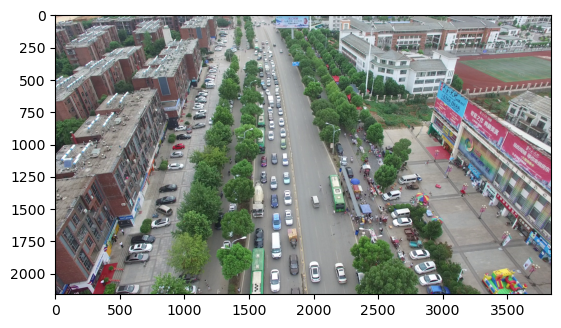

In [15]:
import matplotlib.pyplot as plt

plt.imshow(image)
plt.show()

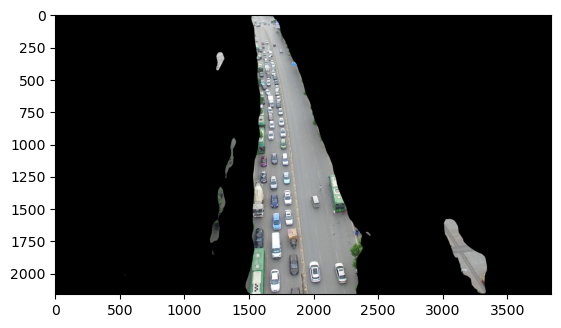

In [16]:
plt.imshow(mask)


In [17]:
path = 'D:/Codes/python/bvision/logs/demo/demo2.png'
plt.imsave(path,mask)